In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("../Data-Analysis-Project/datasets/P4-Movie-Ratings.csv")
print(df.head())

                    Film      Genre  Rotten Tomatoes Ratings %  \
0  (500) Days of Summer      Comedy                         87   
1            10,000 B.C.  Adventure                          9   
2             12 Rounds      Action                         30   
3              127 Hours  Adventure                         93   
4              17 Again      Comedy                         55   

   Audience Ratings %  Budget (million $)  Year of release  
0                  81                   8             2009  
1                  44                 105             2008  
2                  52                  20             2009  
3                  84                  18             2010  
4                  70                  20             2009  


In [5]:
df.shape

(559, 6)

In [6]:
df.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [7]:
df.columns = ['Film', 'Genre', 'RTRatings', 'AudienceRatings',
       'Budget_M', 'Year']

In [8]:
df['Film'] = df['Film'].astype('category')
df['Genre'] = df['Genre'].astype('category')
df['Year'] = df['Year'].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Film             559 non-null    category
 1   Genre            559 non-null    category
 2   RTRatings        559 non-null    int64   
 3   AudienceRatings  559 non-null    int64   
 4   Budget_M         559 non-null    int64   
 5   Year             559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [10]:
df.describe()

,RTRatings,AudienceRatings,Budget_M
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [11]:
df['Genre'].cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

**Join Plot**

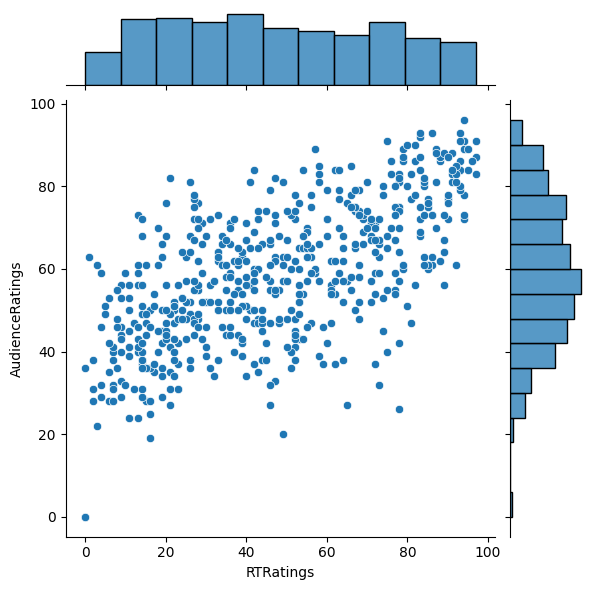

In [12]:
j = sns.jointplot(data=df,x='RTRatings',y='AudienceRatings')

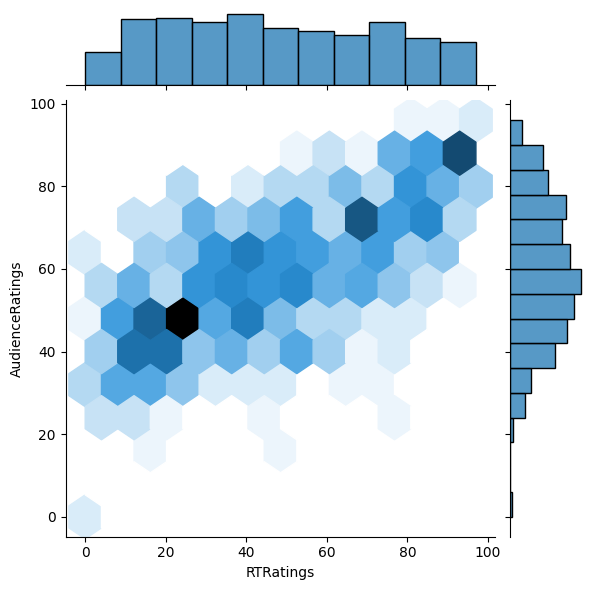

In [13]:
sns.jointplot(data=df,x='RTRatings',y='AudienceRatings',kind='hex')

**Histograms**

<Axes: xlabel='Budget_M', ylabel='Density'>

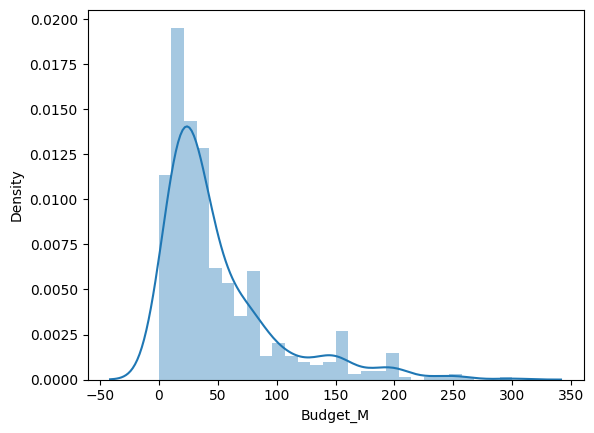

In [14]:
sns.distplot(df['Budget_M'])

(array([134., 183.,  82.,  50.,  33.,  20.,  11.,  20.,   6.,   5.,   9.,
          2.,   3.,   0.,   1.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
        220., 240., 260., 280., 300.]),
 <BarContainer object of 15 artists>)

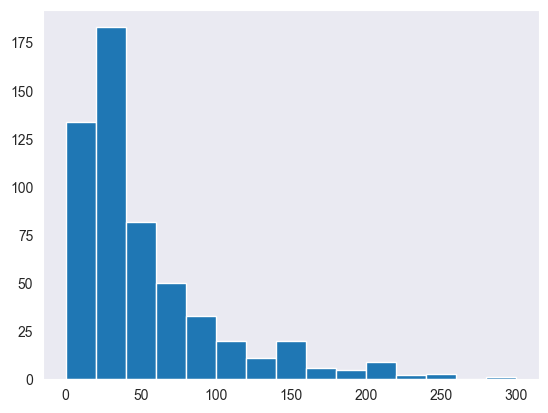

In [15]:
sns.set_style('dark')
plt.hist(data=df,x='Budget_M',bins=15)

**Stacked Histogram**

['Comedy', 'Adventure', 'Action', 'Horror', 'Drama', 'Romance', 'Thriller']
Categories (7, object): ['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance', 'Thriller']


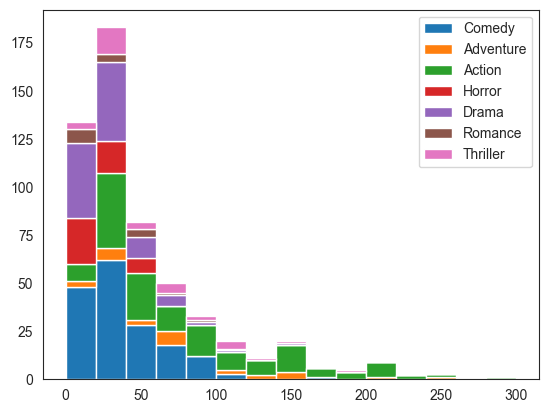

In [16]:
print(df['Genre'].unique())

h_data = []
mylabel = []
for x in df['Genre'].unique():
  h_data.append(df[df['Genre'] == x]['Budget_M'])
  mylabel.append(x)

sns.set_style('white')
plt.hist(h_data,bins=15,stacked=True,label=mylabel)
plt.legend()
plt.show()

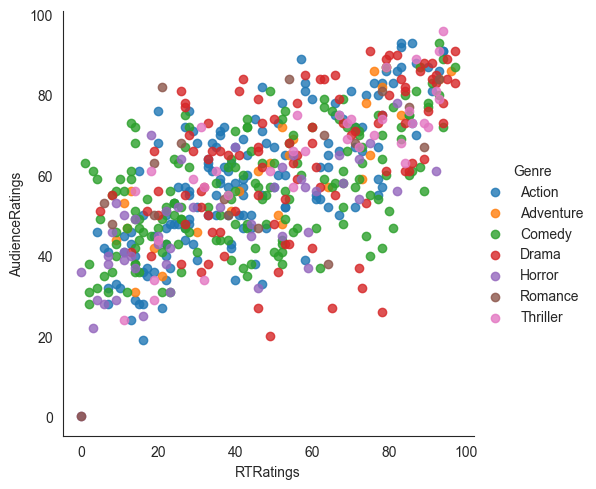

In [17]:
sns.lmplot(data=df,x='RTRatings',y='AudienceRatings',fit_reg=False,hue='Genre')

**KDE Plot**

<Axes: xlabel='RTRatings', ylabel='Budget_M'>

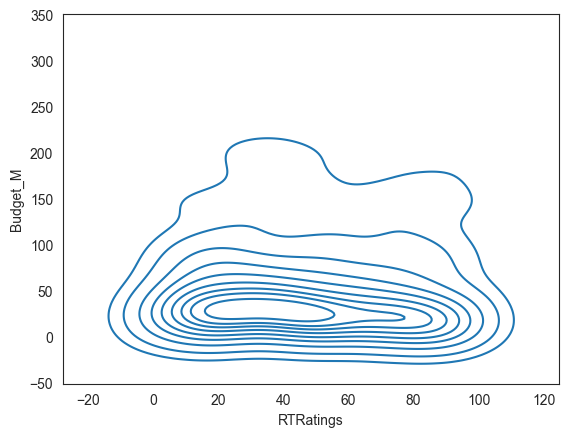

In [18]:
sns.kdeplot(data=df,x='RTRatings',y='Budget_M')

<Axes: xlabel='RTRatings', ylabel='AudienceRatings'>

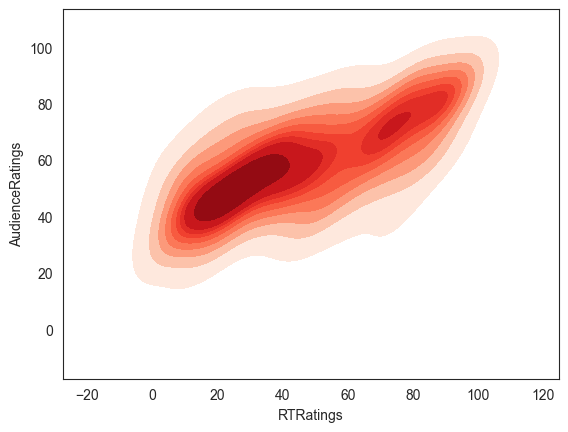

In [19]:
sns.kdeplot(data=df,x='RTRatings',y='AudienceRatings',shade=True,cmap='Reds')

**Sub Plot**

Text(0.5, 1.0, 'Budget_M')

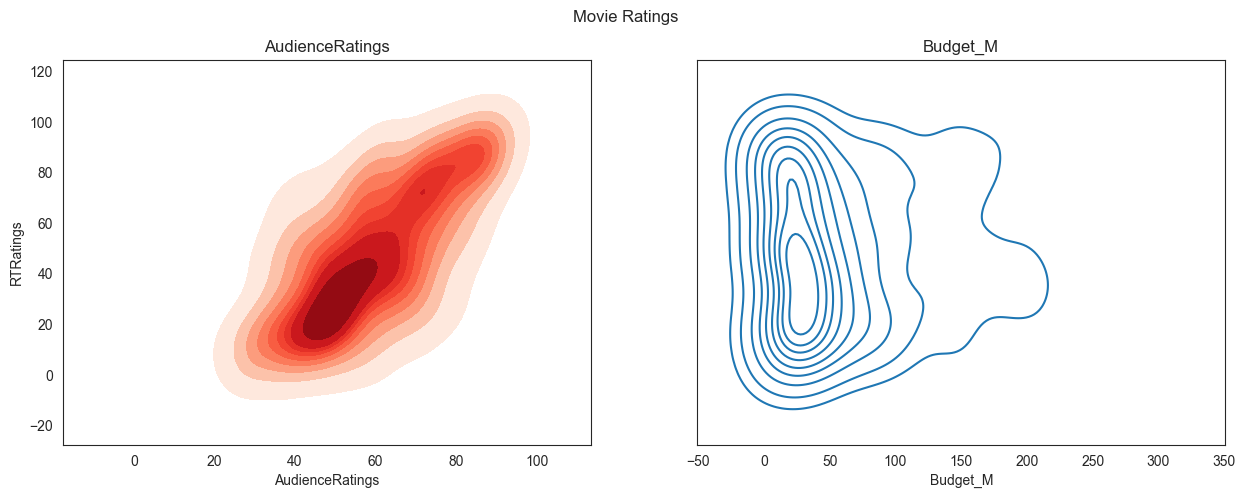

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Movie Ratings')

sns.kdeplot(ax=axes[0],data=df,x='AudienceRatings',y='RTRatings',shade=True,cmap='Reds')
axes[0].set_title("AudienceRatings")

sns.kdeplot(ax=axes[1],data=df,x='Budget_M',y='RTRatings')
axes[1].set_title("Budget_M")

**Dash Bord**

[(-50.0, 250.0)]

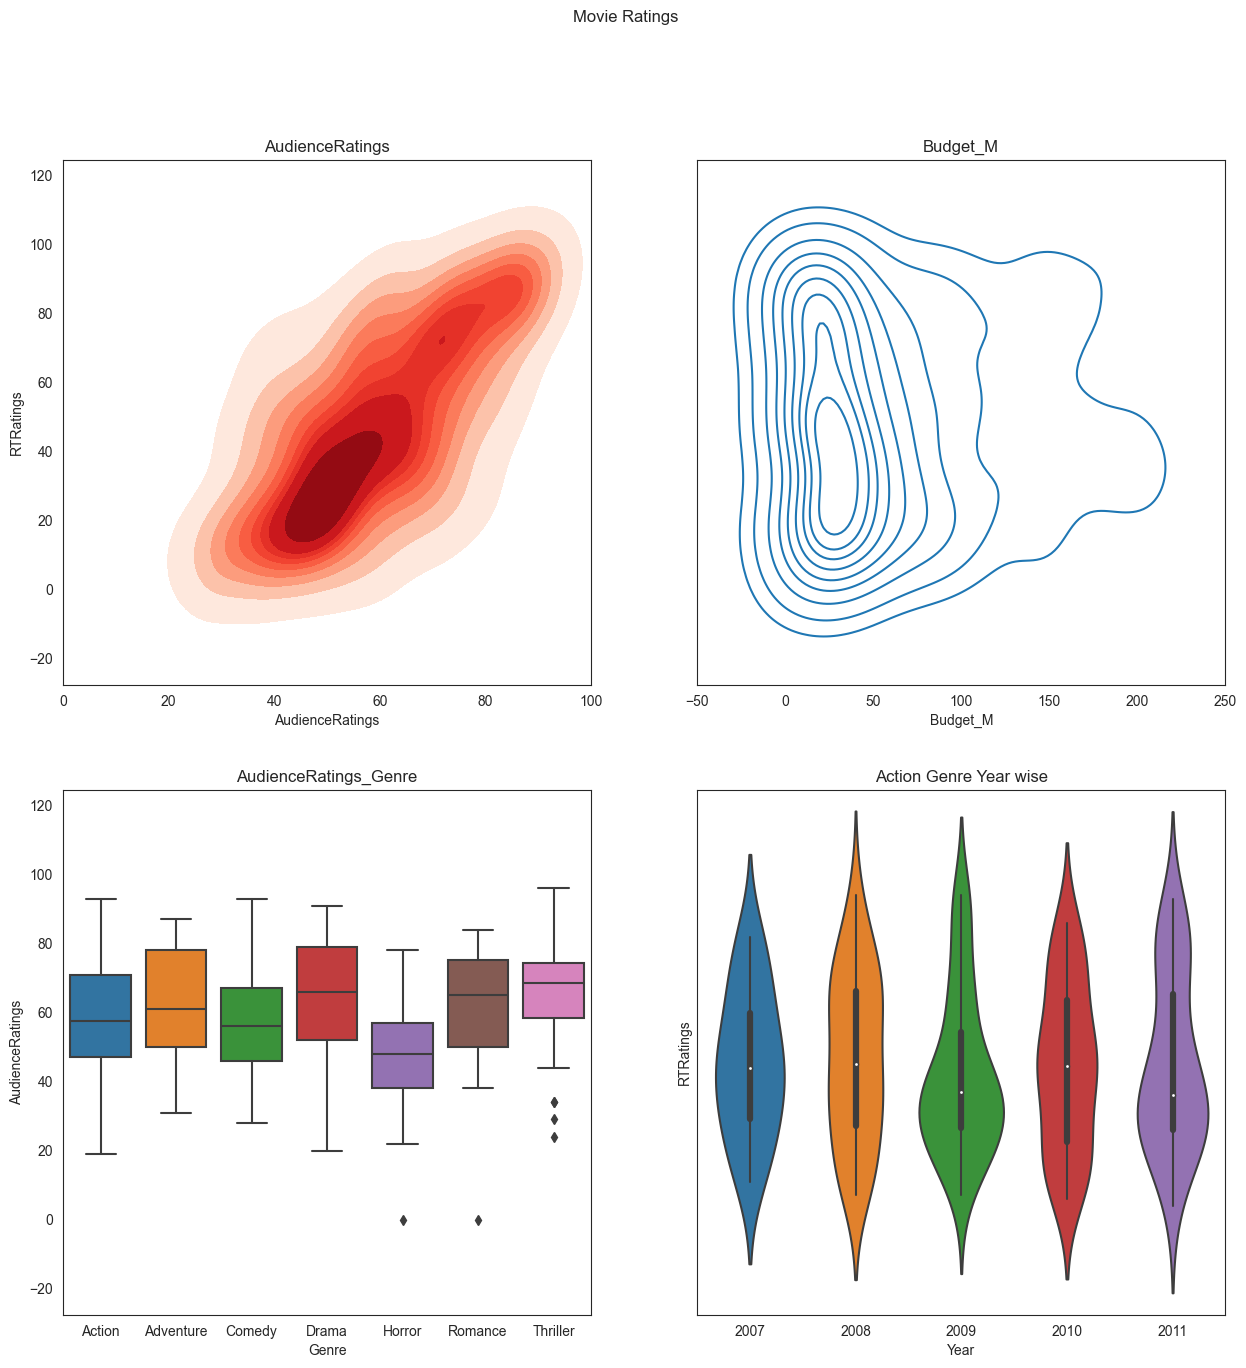

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharey=True)
fig.suptitle('Movie Ratings')

k1 = sns.kdeplot(ax=axes[0,0],data=df,x='AudienceRatings',y='RTRatings',shade=True,cmap='Reds')
axes[0,0].set_title("AudienceRatings")

k2 = sns.kdeplot(ax=axes[0,1],data=df,x='Budget_M',y='RTRatings')
axes[0,1].set_title("Budget_M")

k3 = sns.boxplot(ax=axes[1,0],data=df,x='Genre',y='AudienceRatings')
axes[1,0].set_title("AudienceRatings_Genre")
k4 = sns.violinplot(ax=axes[1,1],data=df[df['Genre']== 'Action'],x='Year',y='RTRatings')
axes[1,1].set_title("Action Genre Year wise")

k1.set(xlim=(0,100))
k2.set(xlim=(-50,250))

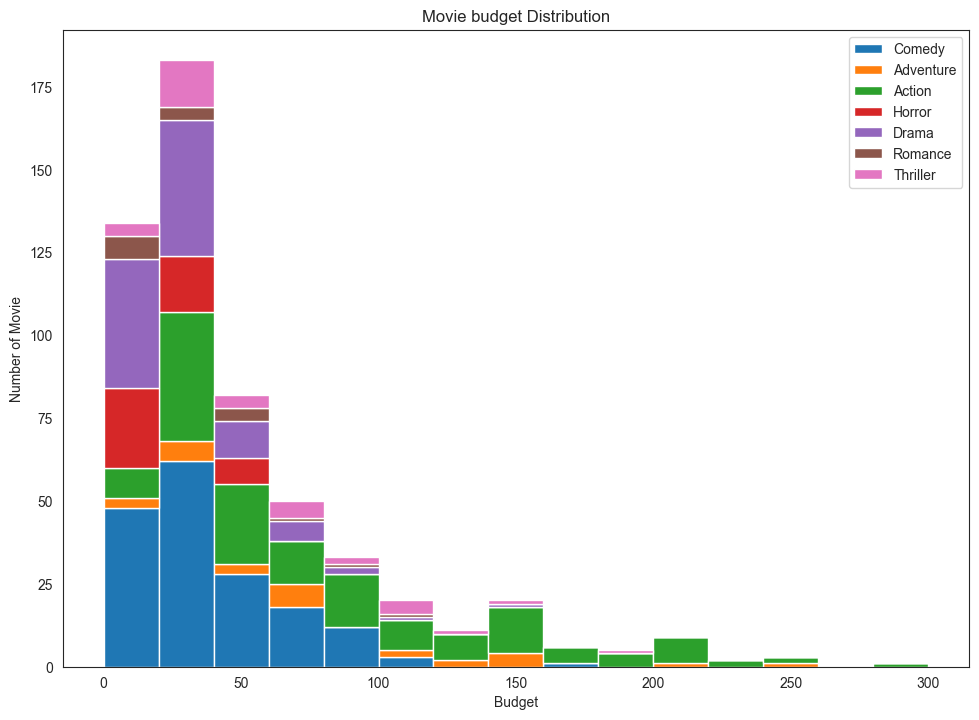

In [22]:
h_data = []
mylabel = []
for x in df['Genre'].unique():
  h_data.append(df[df['Genre'] == x]['Budget_M'])
  mylabel.append(x)

sns.set_style('white')
fig, axes = plt.subplots()
fig.set_size_inches(11.7,8.27) # A4 Sise
h = plt.hist(h_data,bins=15,stacked=True,label=mylabel)
plt.title('Movie budget Distribution')
plt.ylabel('Number of Movie')
plt.xlabel('Budget')
plt.legend()
plt.show()

In [33]:
df2 = pd.read_csv("../Data-Analysis-Project/datasets/P4-Movie-Ratings-2.csv",encoding= 'unicode_escape')
df2.head(1)

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6


In [34]:
df2.columns = ['Week', 'Director', 'Genre', 'Title', 'ReleaseDate',
       'Studio', 'AdjustedGross_M', 'Budget_M', 'Gross_M',
       'IMDb', 'MovieLensRating', 'Overseas_M', 'Overseas_P',
       'Profit_M', 'Profit_P', 'Runtime_Min', 'US_M',
       'GrossUS_M']
print(df2.columns)
df2['ReleaseDate'] = pd.to_datetime(df2['ReleaseDate'])

Index(['Week', 'Director', 'Genre', 'Title', 'ReleaseDate', 'Studio',
       'AdjustedGross_M', 'Budget_M', 'Gross_M', 'IMDb', 'MovieLensRating',
       'Overseas_M', 'Overseas_P', 'Profit_M', 'Profit_P', 'Runtime_Min',
       'US_M', 'GrossUS_M'],
      dtype='object')


In [25]:
df2.describe()

,Budget_M,IMDb,MovieLensRating,Overseas_P,Profit_P,Runtime_Min,US_M,GrossUS_M
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,92.467928,6.923849,3.340378,57.698849,719.278783,117.781250,167.135197,42.301151
std,59.421407,0.925890,0.454071,12.334237,1942.807248,23.179122,92.465903,12.334237
min,0.600000,3.600000,1.490000,17.200000,7.700000,30.000000,0.000000,0.000000
25%,45.000000,6.375000,3.037500,49.900000,201.850000,100.000000,106.950000,33.700000
50%,80.000000,6.900000,3.365000,58.200000,338.550000,116.000000,141.700000,41.800000
75%,130.000000,7.600000,3.672500,66.300000,650.100000,130.250000,202.100000,50.100000
max,300.000000,9.200000,4.500000,100.000000,41333.300000,238.000000,760.500000,82.800000


In [27]:
df2['Week'].unique()

array(['Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Saturday', 'Sunday'],
      dtype=object)

In [73]:
import numpy as np
df2['ReleaseDate'].max()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Week             608 non-null    object        
 1   Director         608 non-null    object        
 2   Genre            608 non-null    object        
 3   Title            608 non-null    object        
 4   ReleaseDate      608 non-null    datetime64[ns]
 5   Studio           608 non-null    object        
 6   AdjustedGross_M  608 non-null    object        
 7   Budget_M         608 non-null    float64       
 8   Gross_M          608 non-null    object        
 9   IMDb             608 non-null    float64       
 10  MovieLensRating  608 non-null    float64       
 11  Overseas_M       608 non-null    object        
 12  Overseas_P       608 non-null    float64       
 13  Profit_M         608 non-null    object        
 14  Profit_P         608 non-null    float64  

In [57]:
df_weekend = df2[(df2['Week'] == 'Saturday') | (df2['Week'] == 'Sunday')]
print(df_weekend.shape)
print(df_weekend.isnull().sum())
print(df_weekend['Budget_M'].sum())

(4, 18)
Week               0
Director           0
Genre              0
Title              0
ReleaseDate        0
Studio             0
AdjustedGross_M    0
Budget_M           0
Gross_M            0
IMDb               0
MovieLensRating    0
Overseas_M         0
Overseas_P         0
Profit_M           0
Profit_P           0
Runtime_Min        0
US_M               0
GrossUS_M          0
dtype: int64
466.0


In [75]:
df_weekday = df2[(df2['Week'] != 'Saturday') | (df2['Week'] != 'Sunday')]
print(df_weekday.shape)
print(df_weekday.isnull().sum())
print(df_weekday['Budget_M'].sum())

(608, 18)
Week               0
Director           0
Genre              0
Title              0
ReleaseDate        0
Studio             0
AdjustedGross_M    0
Budget_M           0
Gross_M            0
IMDb               0
MovieLensRating    0
Overseas_M         0
Overseas_P         0
Profit_M           0
Profit_P           0
Runtime_Min        0
US_M               0
GrossUS_M          0
dtype: int64
56220.5


In [84]:
df2[df2['ReleaseDate'] > '2015-05-22']

,Week,Director,Genre,Title,ReleaseDate,Studio,AdjustedGross_M,Budget_M,Gross_M,IMDb,MovieLensRating,Overseas_M,Overseas_P,Profit_M,Profit_P,Runtime_Min,US_M,GrossUS_M
74,Friday,Pete Docter,animation,Inside Out,2015-06-19,Buena Vista Studios,266.6,175.0,266.6,8.8,4.15,81.5,30.6,91.6,52.3,102,185.1,69.4
318,Friday,Brad Peyton,action,San Andreas,2015-05-29,WB,441.2,110.0,441.2,6.6,2.84,299.2,67.8,331.2,301.1,114,142.0,32.2
584,Friday,Colin Trevorrow,action,Jurassic World,2015-06-12,Universal,"1,245.90",215.0,"1,245.90",7.5,3.45,745.5,59.8,"1,030.90",479.5,124,500.4,40.2


In [85]:
def foo(x):
    y = str(x)
    y = y.split('-')[0]
    return y  
df2['Year'] = df2['ReleaseDate'].apply(lambda x : foo(x))
df2.head()

,Week,Director,Genre,Title,ReleaseDate,Studio,AdjustedGross_M,Budget_M,Gross_M,IMDb,MovieLensRating,Overseas_M,Overseas_P,Profit_M,Profit_P,Runtime_Min,US_M,GrossUS_M,Year
0,Friday,Brad Bird,action,Tomorrowland,2015-05-22,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6,2015
1,Friday,Scott Waugh,action,Need for Speed,2014-03-14,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4,2014
2,Friday,Patrick Hughes,action,The Expendables 3,2014-08-15,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1,2014
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,2012-03-16,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7,2012
4,Friday,Roland Emmerich,action,White House Down,2013-06-28,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6,2013


<Axes: xlabel='Year'>

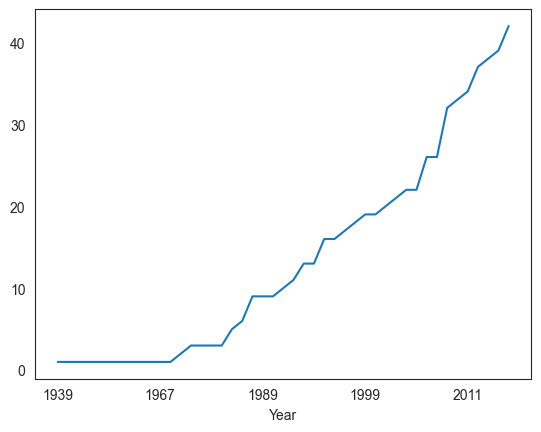

In [92]:
df2['Year'].value_counts(ascending=True).plot()

<Axes: xlabel='Year'>

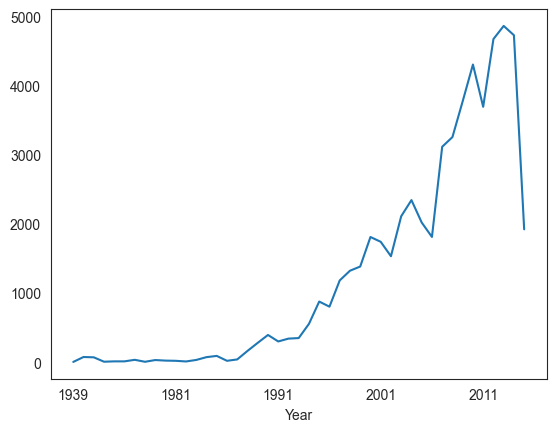

In [89]:
g =df2.groupby('Year')['Budget_M'].sum()

g.plot()

In [103]:
def recomtofot(x):
    y = str(x)
    y = y.replace(',','')
    return np.float64(y)

df2['Profit_M'] = df2['Profit_M'].apply(lambda x: recomtofot(x))

g1 =df2.groupby('Week')['Profit_M'].sum()

print(g1)

Week
Friday       1952800.0
Saturday        5489.0
Sunday          1827.0
Thursday       88672.0
Tuesday        35713.0
Wednesday     647850.0
Name: Profit_M, dtype: float64


<Axes: xlabel='Week'>

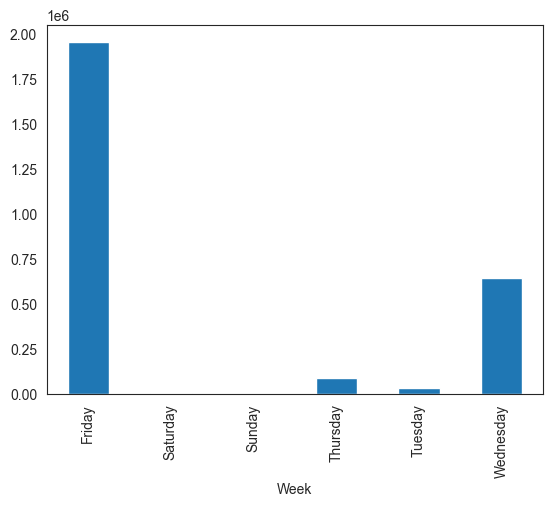

In [104]:
g1.plot(kind='bar')

In [108]:
print(type(df2['US_M'][0]))

<class 'numpy.float64'>


<Axes: xlabel='Year'>

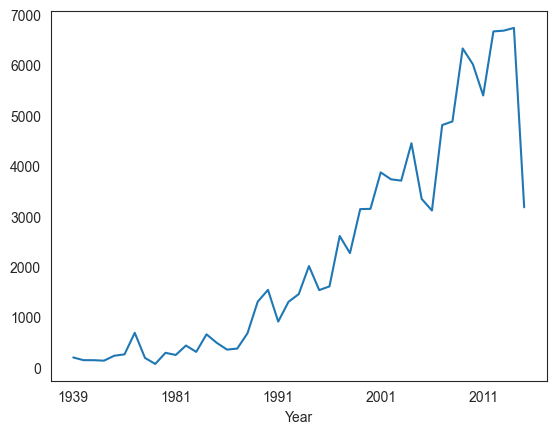

In [111]:
g2 = df2.groupby('Year')['US_M'].sum()
g2.plot()